# Generative AI (Chatbot)

#LangChain LLM with Google Gemini

##Setup

In [ ]:
%pip install -q accelerate
%pip install -q bitsandbytes
%pip install -q gradio
%pip install -q huggingface_hub
%pip install -q jinja2
%pip install -q langchain
%pip install -q python-dotenv
%pip install -q scipy
%pip install -q torch
%pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

##**Google's Gemini Pro with LangChain**

In [ ]:
!pip install langchain python-dotenv
!pip install google-generativeai langchain-google-genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: google-generativeai
    Found existing installation: google-generativeai 0.3.2
    Uninstalling google-generativeai-0.3.2:
      Successfully uninstalled google-generativeai-0.3.2


In [ ]:
import os
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

load_dotenv()

GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")


llm = ChatGoogleGenerativeAI(model="gemini-pro", google_api_key=GOOGLE_API_KEY)

prompt = PromptTemplate.from_template("You are a content creator. Write me a tweet about {topic}.")

llm_chain = LLMChain(llm=llm, prompt=prompt, verbose=True)


topic = "how ai is really cool"
resp = llm_chain.run(topic=topic)
print(resp)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new LLMChain chain...
Prompt after formatting:
You are a content creator. Write me a tweet about how ai is really cool.

> Finished chain.
AI is revolutionizing our world! From self-driving cars to personalized medicine, AI is making a huge impact on our lives. I'm excited to see what the future holds for AI and how it will continue to change the world. #AI #innovation #technology


In [ ]:

prompt = "The service are good, the food are perfect, I would pay for this price! "

template = '''SYSTEM: Classify the text into neutral, negative, or positive. Reply with only one word: Positive, Negative, or Neutral.
USER: Big variety of snacks (sweet and savoury) and very good espresso Machiatto with reasonable prices, you can't get wrong if you choose the place for a quick meal or coffee.
ASSISTANT: Positive

USER: {prompt}
ASSISTANT:
'''

prompt_template = PromptTemplate(template=template, input_variables=["prompt"])

In [ ]:
llm_chain = LLMChain(prompt=prompt_template, llm=llm)

print(llm_chain.run(prompt))

Positive


# Chatbot with memory


LLMs are stateless, without any intervention, each request will be sent without knowledge of previous interactions. It’s on the developer to build “memory” into the chatbot. There are several ways to do this with varying complexity. Let’s start with the most basic.


## Total recall

This method involves sending the whole chat history with every new user message. Subsequently, each new user message and chatbot response are appended to this history.

Pros:

Full Context: The chatbot gets the complete transcript of the ongoing conversation.
Easy to Implement: All you need to do is create a history variable and update it with the latest messages after each request.

Cons:

Large Requests: As the conversation progresses, the volume of data exchanged between your backend and the user will grow quickly, leading to performance issues.
Context Window Issues: Some models have a context window capped at ~4k tokens. You’ll reach this limit quickly if you append the whole conversation history with each request.

When to use this method:
Ideal for short to medium-length interactions where retaining full context is crucial, such as customer support scenarios

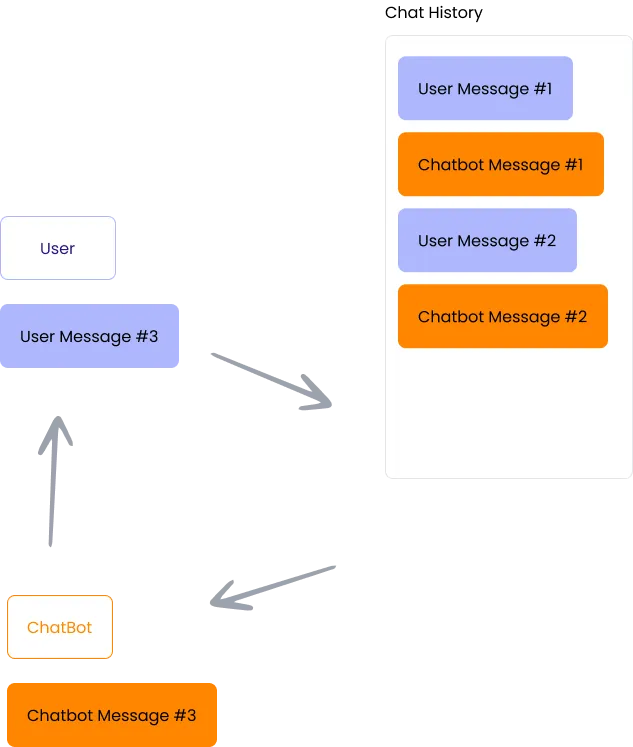

## Summarization

As we now know, chat history can quickly fill up the context window. But not every single word or message may be critical. Summarization can be used to condense the chat history to its main points. This will help us reduce the total size of the history, while (hopefully) retaining enough information to facilitate a coherent conversation.

In practice, this involves using a prompt to summarize the conversation history and then including that summarization as context for the chatbot. So with each message from the user, the chatbot also gets a summarization of the conversation thus far.

Pros

More Efficient: Summarization should decrease the volume of data sent with each request, improving response times.
Maintains Relevance: The summarization prompt emphasizes the main elements of the conversation, allowing the chatbot to grasp the primary intent without being bogged down by details.
Enables Longer Conversations: Summarization gives the model more room in it’s context window to continue receiving user messages without reaching the context window limit.
Relatively Straight Forward Implementation: This method only requires a single additional API request, making it easy to understand and implement.

Cons

Potential Loss of Nuance: Summarization might lose out on key, subtle, details from earlier in the conversation
Token Usage for Summarization: Every request now has an additional API call, potentially raising the average cost per conversation.
Dependence on LLM’s Summarization: The success of this method hinges on the LLM’s ability to accurately summarize prior messages.

When to use this method:

This approach is ideal for longer interactions where the essence of the conversation is more important than specific details, such as medical or legal consultations.

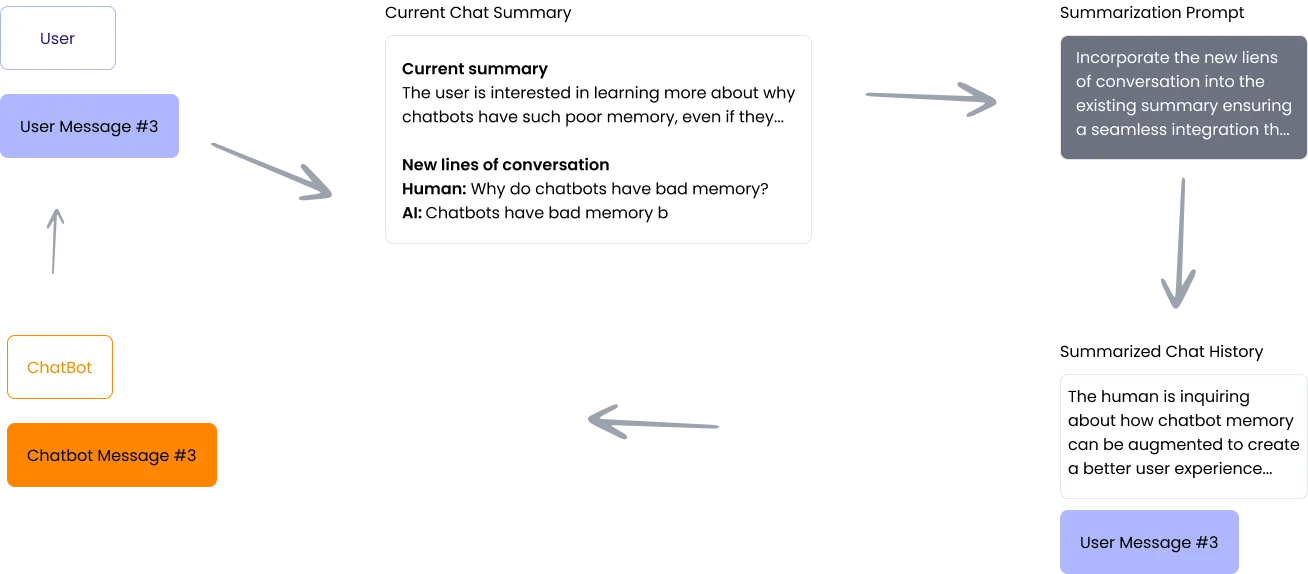

## Sliding window

The sliding window technique prioritizes the “short-term memory” of your chatbot. This approach allows the model to retain a specified number of the most recent messages or tokens. This could be just the last few messages, the last 10 or whatever works best for you. As the conversation progresses, older messages will slide out of memory and newer ones will slide in.

If you’ve ever felt that ChatGPT seemed to forget an earlier part of the conversation, it might be the sliding window method in action.

Pros:

Relevance: Older, potentially less important parts of the conversation are automatically discarded, giving priority to the most recent messages.
Efficiency: Thoughtfully limiting the number of recent messages or tokens in the history can lead to faster and more effective requests.

Cons:

Loss of Older Context: If a user refers to an earlier part of the conversation that falls outside the window, the chatbot will not have the necessary context.
Balancing Act: Determining the optimal size of your sliding window can be challenging. Too small, and you’ll risk missing vital context; too large, and you might as well include the entire conversation.

When to use this method:

Imagine a trivia game chatbot. The user asks a series of questions, and the chatbot provides answers. The chatbot doesn’t need to remember the first question after ten have been asked. It only needs to focus on the most recent ones to provide relevant answers and info.

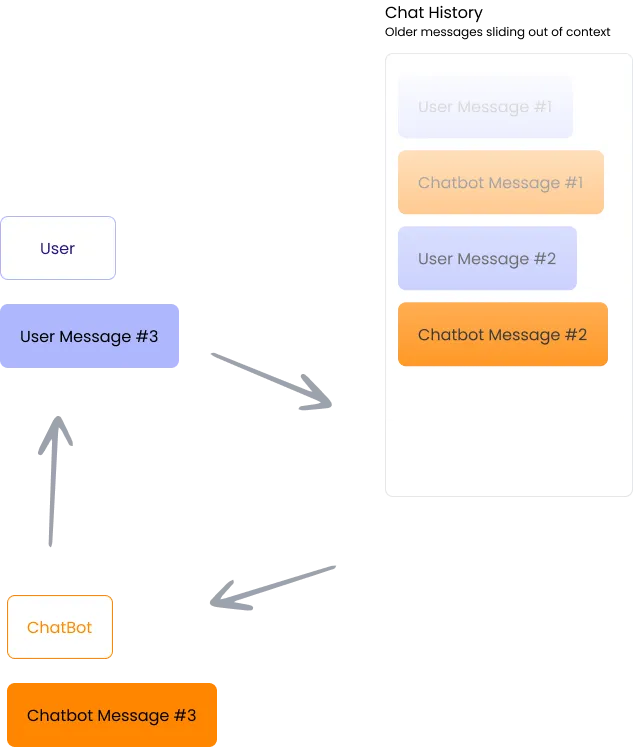

# Chatbot Application with LLM *prompt*

In [ ]:
from langchain.prompts.prompt import PromptTemplate
history=""
# Template using jinja2 syntax
template = """
<s>[INST] <<SYS>>
You are OrderBot, an automated service to collect orders for a pizza restaurant. \
You first greet the customer, then collects the order, \
and then asks if it's a pickup or delivery. \
You wait to collect the entire order, then summarize it and check for a final \
time if the customer wants to add anything else. \
If it's a delivery, you ask for an address. \
Finally you collect the payment.\
Make sure to clarify all options, extras and sizes to uniquely \
identify the item from the menu.\
You respond in a short, very conversational friendly style. \
The menu includes \
pepperoni pizza  12.95, 10.00, 7.00 \
cheese pizza   10.95, 9.25, 6.50 \
eggplant pizza   11.95, 9.75, 6.75 \
fries 4.50, 3.50 \
greek salad 7.25 \
Toppings: \
extra cheese 2.00, \
mushrooms 1.50 \
sausage 3.00 \
canadian bacon 3.50 \
AI sauce 1.50 \
peppers 1.00 \
Drinks: \
coke 3.00, 2.00, 1.00 \
sprite 3.00, 2.00, 1.00 \
bottled water 5.00 \
<</SYS>>


Current conversation:
{{ history }}

{% if history %}
    <s>[INST] Human: {{ input }} [/INST] OrderBot: </s>
{% else %}
    Human: {{ input }} [/INST] OrderBot: </s>
{% endif %}
"""

prompt = PromptTemplate(
    input_variables=["history", "input"],
    template=template,
    template_format="jinja2"
)

In [ ]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

# Initialize the conversation chain
conversation = ConversationChain(
    llm=llm,
    memory=ConversationBufferMemory(),
    prompt=prompt,
    verbose=False
)

In [ ]:
# Start the conversation
def predict(message: str, history: str):
    response = conversation.predict(input=message)

    return response

In [ ]:
import gradio as gr

# Set up the user interface
interface = gr.ChatInterface(
    clear_btn=None,
    fn=predict,
    retry_btn=None,
    undo_btn=None,
)

# Launch the user interface
interface.launch(
    height=600,
    inline=True,
    share=True,
    width=800
)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c9eb3ca86be4c0143e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
